In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\dwm\Datasets\Iris.csv")
print("Some Records of dataset \n")
df.head()


Some Records of dataset 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

print("Unique Species: \n")
df['Species'].unique()

Unique Species: 



array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:

#assigning Integer value to categorical data ,bcz regression is only for statistical data
df['Species']=df['Species'].replace('Iris-setosa',1)
df['Species']=df['Species'].replace('Iris-versicolor',2)
df['Species']=df['Species'].replace('Iris-virginica',3)

print("Unique Species after Assigning Integer Value:\n")
df['Species'].unique()

Unique Species after Assigning Integer Value:



array([1, 2, 3], dtype=int64)

In [5]:
X1=np.array(df.iloc[:,1:2])
X2=np.array(df.iloc[:,2:3])
X3=np.array(df.iloc[:,3:4])
X4=np.array(df.iloc[:,4:5])
Y=np.array(df.iloc[:,-1])


In [6]:
X1_mean=X1.mean()
X2_mean=X2.mean()
X3_mean=X3.mean()
X4_mean=X4.mean()
Y_mean=Y.mean()
print("Mean of X1 : ",X1_mean)
print("Mean of X2 : ",X2_mean)
print("Mean of X3 : ",X3_mean)
print("Mean of X4 : ",X4_mean)
print("Mean of Y  : ",Y_mean)

Mean of X1 :  5.843333333333334
Mean of X2 :  3.0540000000000003
Mean of X3 :  3.758666666666666
Mean of X4 :  1.1986666666666668
Mean of Y  :  2.0


In [7]:
n=df.shape[0]
print("n : ",n)


n :  150


In [8]:
Xi_Xm1=[]
Xi_Xm2=[]
Xi_Xm3=[]
Xi_Xm4=[]
Yi_Ym=[]

Num1=[]
Num2=[]
Num3=[]
Num4=[]

Xi_Xm1_2=[]
Xi_Xm2_2=[]
Xi_Xm3_2=[]
Xi_Xm4_2=[]


In [9]:
for i in range(n):
    Xi_Xm1.append(X1[i]-X1_mean)
    Xi_Xm2.append(X2[i]-X2_mean)
    Xi_Xm3.append(X3[i]-X3_mean)
    Xi_Xm4.append(X4[i]-X4_mean)
    Yi_Ym.append(Y[i]-Y_mean)
    Num1.append(Xi_Xm1[i]*Yi_Ym[i])
    Num2.append(Xi_Xm2[i]*Yi_Ym[i])
    Num3.append(Xi_Xm3[i]*Yi_Ym[i])
    Num4.append(Xi_Xm4[i]*Yi_Ym[i])
    Xi_Xm1_2.append(Xi_Xm1[i]**2)
    Xi_Xm2_2.append(Xi_Xm2[i]**2)
    Xi_Xm3_2.append(Xi_Xm3[i]**2)
    Xi_Xm4_2.append(Xi_Xm4[i]**2)

In [10]:
Num1_mean=np.mean(Num1)
Num2_mean=np.mean(Num2)
Num3_mean=np.mean(Num3)
Num4_mean=np.mean(Num4)
Den_mean1=np.mean(Xi_Xm1_2)
Den_mean2=np.mean(Xi_Xm2_2)
Den_mean3=np.mean(Xi_Xm3_2)
Den_mean4=np.mean(Xi_Xm4_2)
m1=Num1_mean/Den_mean1
print("m1 : ",m1)

m2=Num2_mean/Den_mean2
print("m2 : ",m2)

m3=Num3_mean/Den_mean3
print("m3 : ",m3)

m4=Num4_mean/Den_mean4
print("m4 : ",m4)

b=Y_mean-m1*X1_mean-m2*X2_mean-m3*X3_mean-m4*X4_mean
print("b  : ",b)

m1 :  0.7742124924552618
m2 :  -0.792500517624212
m3 :  0.44064664967700284
m4 :  1.0267374256354787
b  :  -2.990644884870258


In [11]:
def species_predict(X1,X2,X3,X4):
    return m1*X1+m2*X2+m3*X3+m4*X4+b

In [12]:
SepalLength=5.1
SepalWidth=3.5
PetalLength=1.4
PetalWidth=0.2
print("Iris Specias for Sepal Length",SepalLength," Sepal Width", SepalWidth," Petal Length",PetalLength," PetalWidth",
      PetalWidth," is ",species_predict(SepalLength,SepalWidth,PetalLength,PetalWidth))

Iris Specias for Sepal Length 5.1  Sepal Width 3.5  Petal Length 1.4  PetalWidth 0.2  is  -0.9936601903582656


In [13]:
sns.set_theme(color_codes=True)

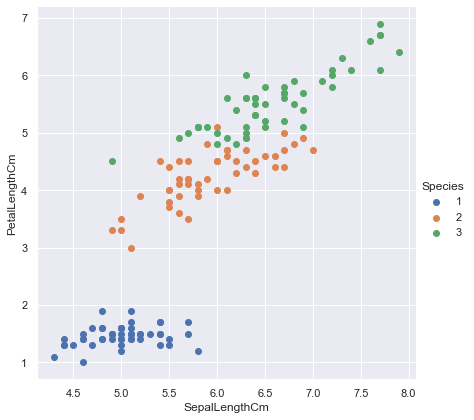

In [14]:
sns.FacetGrid(df, hue ="Species",height = 6).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()


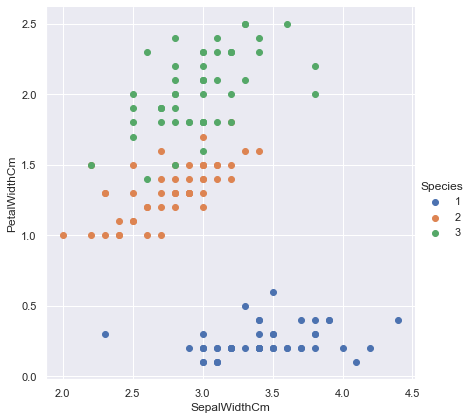

In [15]:
sns.FacetGrid(df, hue ="Species",height = 6).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()